In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


In [6]:
ds = pd.read_csv('/content/sample_data/5gnidd.csv', low_memory = False)
ds.head()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign


In [7]:
ds.describe()

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat
count,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,353.000000,...,5205.000000,4.700000e+03,42.000000,17.0,12.0,4.700000e+03,3.000000e+01,5205.000000,5205.000000,5205.000000
mean,2602.000000,2364.517387,0.145005,0.145005,0.145005,0.145005,0.145005,0.145005,0.731604,15.274788,...,1.084783,4.941189e+03,19163.952381,610.0,610.0,1.094788e+09,1.521112e+09,0.000074,0.000035,0.000039
std,1502.698406,1484.548114,0.819582,0.819582,0.819582,0.819582,0.819582,0.819582,11.070993,50.356184,...,6.567670,9.488501e+04,25689.767421,0.0,0.0,5.911967e+08,1.112301e+09,0.002818,0.001952,0.001004
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,610.0,610.0,5.928700e+05,4.395694e+08,0.000000,0.000000,0.000000
25%,1301.000000,1068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,610.0,610.0,8.675724e+08,4.395754e+08,0.000000,0.000000,0.000000
50%,2602.000000,2353.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,474.500000,610.0,610.0,8.676379e+08,1.224891e+09,0.000000,0.000000,0.000000
75%,3903.000000,3654.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,31104.000000,610.0,610.0,1.668724e+09,2.041865e+09,0.000000,0.000000,0.000000
max,5204.000000,4946.000000,4.999948,4.999948,4.999948,4.999948,4.999948,4.999948,224.000000,186.000000,...,134.300293,3.737600e+06,69888.000000,610.0,610.0,4.294967e+09,4.226526e+09,0.193003,0.139067,0.053936


In [8]:
pd.set_option('display.max_columns', None)
ds

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,dTos,sDSb,dDSb,sTtl,dTtl,sHops,dHops,Cause,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,Offset,sMeanPktSz,dMeanPktSz,Load,SrcLoad,DstLoad,Loss,SrcLoss,DstLoss,pLoss,SrcGap,DstGap,Rate,SrcRate,DstRate,State,SrcWin,DstWin,sVid,dVid,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,Label,Attack Type,Attack Tool
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,NaN,cs0,NaN,58.0,NaN,6.0,NaN,Start,1,1,0,98,98,0,128,98.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,NaN,NaN,0.000000,0.000000,0.000000,ECO,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,NaN,cs0,NaN,58.0,NaN,6.0,NaN,Start,1,1,0,98,98,0,232,98.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,NaN,NaN,0.000000,0.000000,0.000000,ECO,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,0.0,cs0,cs0,117.0,64.0,11.0,0.0,Start,214,196,18,249093,244212,4881,336,1245.979614,271.166656,396280.1250,388901.1875,7378.921875,0,0,0,0.0,NaN,NaN,42.616875,39.015450,3.401347,CON,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,0.0,cs0,cs0,117.0,64.0,11.0,0.0,Start,184,163,21,221712,216245,5467,440,1326.656494,260.333344,352339.9375,344005.4688,8334.472656,0,0,0,0.0,NaN,NaN,36.614376,32.412727,4.001571,CON,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,0.0,cs0,cs0,117.0,64.0,11.0,0.0,Start,223,204,19,280216,275723,4493,544,1351.583374,236.473679,445855.1563,439043.2188,6811.945312,0,0,0,0.0,NaN,NaN,44.404858,40.604443,3.600394,CON,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,Benign,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,5200,4942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,tcp,0.0,NaN,cs0,NaN,38.0,NaN,26.0,NaN,Start,1,1,0,58,58,0,507148,58.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,REQ,18432.0,NaN,NaN,NaN,17369830.0,NaN,0.0,0.0,0.0,Malicious,SYNScan,Nmap
5201,5201,4943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,tcp,0.0,NaN,cs0,NaN,39.0,NaN,25.0,NaN,Start,1,1,0,58,58,0,507244,58.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,REQ,72.0,NaN,NaN,NaN,17369830.0,NaN,0.0,0.0,0.0,Malicious,SYNScan,Nmap
5202,5202,4944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,tcp,0.0,NaN,cs0,NaN,39.0,NaN,25.0,NaN,Start,1,1,0,58,58,0,507340,58.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,REQ,18432.0,NaN,NaN,NaN,17369830.0,NaN,0.0,0.0,0.0,Malicious,SYNScan,Nmap
5203,5203,4945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,tcp,0.0,NaN,cs0,NaN,50.0,NaN,14.0,NaN,Start,1,1,0,58,58,0,507436,58.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,REQ,72.0,NaN,NaN,NaN,17369830.0,NaN,0.0,0.0,0.0,Malicious,SYNScan,Nmap


In [9]:
# Dropping unnecessary columns:-
unnecessary_columns = ['Unnamed: 0', 'RunTime', 'Min', 'Max', 'sTos', 'dTos',
                       'sDSb', 'dDSb', 'sHops', 'dHops', 'SrcWin','DstWin',
                       'sVid', 'dVid', 'SrcTCPBase', 'DstTCPBase', 'TcpRtt',
                       'SynAck', 'AckDat'
                      ]

ds = ds.drop(unnecessary_columns, axis=1)

In [10]:
# Dropping any missing values:-
ds = ds.dropna()

In [11]:
print(ds.duplicated().sum())
# dropping any duplicate values:-
ds = ds.drop_duplicates()
print(ds.shape)
print(ds.head())

0
(42, 33)
    Seq       Dur      Mean       Sum Proto  sTtl  dTtl  Cause  TotPkts  \
23   20  0.124988  0.124988  0.124988   tcp  64.0  53.0  Start       10   
47   40  0.001938  0.001938  0.001938   tcp  50.0  59.0  Start        2   
56   45  0.014995  0.014995  0.014995   tcp  63.0  59.0  Start        3   
58   47  0.015981  0.015981  0.015981   tcp  63.0  59.0  Start        3   
68   57  0.001547  0.001547  0.001547   tcp  45.0  59.0  Start        2   

    SrcPkts  DstPkts  TotBytes  SrcBytes  DstBytes  Offset  sMeanPktSz  \
23        5        5      2093       921      1172    2564  184.199997   
47        1        1       112        58        54    5084   58.000000   
56        2        1       170       112        58    6092   56.000000   
58        2        1       170       112        58    6396   56.000000   
68        1        1       112        58        54    7468   58.000000   

    dMeanPktSz          Load      SrcLoad      DstLoad  Loss  SrcLoss  \
23  234.399994  1072

In [12]:
# Separating feature columns (X) and label columns (Y):-
X = ds.drop(['Label','Attack Type','Attack Tool'], axis = 1)
Y = ds['Label']

In [13]:
cat_col = ['Proto','Cause','State']
X = pd.get_dummies(X, columns = cat_col)

In [14]:
columns_to_scale = ['Seq','Dur','Mean','Sum','TotPkts','SrcPkts','DstPkts',
                    'TotBytes','SrcBytes','DstBytes','Offset','sMeanPktSz',
                    'dMeanPktSz','Load','SrcLoad','DstLoad','Loss','SrcLoss',
                    'DstLoss','pLoss','Rate','SrcRate','DstRate','SrcGap','DstGap',
                    'sTtl','dTtl'
                    ]
numeric_data = ds[columns_to_scale]
# Min Max Scaling:-
min_max_scaling = MinMaxScaler()
# Applying Z-Score Normalization:-
standard_scaling = StandardScaler()
standard_scaled_data = standard_scaling.fit_transform(numeric_data)
standard_scaled_data = pd.DataFrame(standard_scaled_data, columns = columns_to_scale)

In [15]:
# Converting dataframe to numpy array:-
X = X.to_numpy()

In [16]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Encode the target labels (Y)
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)



In [17]:
# Converting target labels to one-hot encoding;-
numerical_classes = len(label_encoder.classes_)
Y = tf.keras.utils.to_categorical(Y_encoded, numerical_classes)


In [18]:
Y_reshaped = Y.ravel()

In [19]:
smote = SMOTE(random_state = 42)
features_resampled, labels_resampled = smote.fit_resample(standard_scaled_data, Y)
print(features_resampled.shape, labels_resampled.shape)

(48, 27) (48, 1)


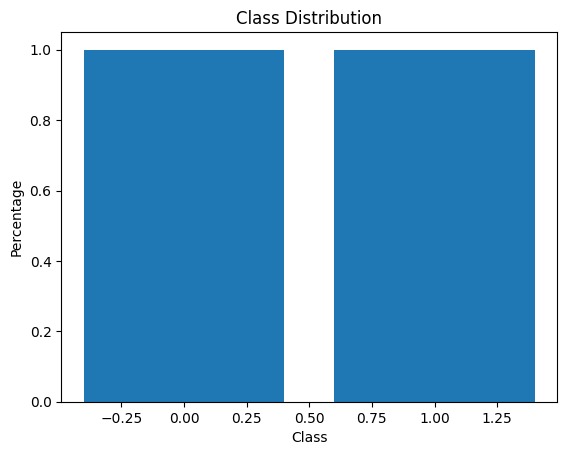

In [20]:
unique, counts = np.unique(Y, return_counts=True)

class_distribution = dict(zip(unique, counts / len(Y)))

plt.bar(class_distribution.keys(), class_distribution.values())
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features_resampled, labels_resampled, test_size=0.2, random_state=42)

In [22]:
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [17 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [23]:
svm = SVC(kernel = 'rbf', C = 1, gamma = 'scale')
svm.fit(X_train_selected, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1)

In [24]:
accuracy = svm.score(X_test_selected, y_test)
print('testing accuracy is: ', accuracy)
accuracy = svm.score(X_train_selected, y_train)
print('training accuracy is: ', accuracy)

testing accuracy is:  0.9
training accuracy is:  0.8947368421052632


In [25]:
smote = SMOTE(random_state = 42)
features_resampled, labels_resampled = smote.fit_resample(standard_scaled_data, Y)
features_resampled.shape, labels_resampled.shape

((48, 27), (48, 1))

In [26]:
svm_model = SVC(kernel = 'linear', C = 1)
scores = cross_val_score(svm_model, X_train_selected, y_train, cv = 10)

print("Accuracy: %0.2f(+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92(+/- 0.34)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1)

# perform 5-fold cross-validation
scores = cross_val_score(svm_model, X_train_selected, y_train, cv=10)

# print the mean accuracy and standard deviation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.27)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# define the SVM parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly']}

# create an SVM model
svm_model = SVC()

# perform grid search to find the optimal hyperparameters
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

# print the best hyperparameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best parameters:  {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
Best score:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features_resampled, labels_resampled, test_size=0.2, random_state=42)
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [17 23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [30]:
from sklearn.svm import SVC


svm_model = SVC(C= 10, gamma= 0.1, kernel= 'linear')


scores = cross_val_score(svm_model, X_train_selected, y_train, cv=10)


print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Accuracy: 0.94 (+/- 0.24)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
from sklearn.svm import SVC

# create an SVM model with regularization parameter C = 0.1
svm_model = SVC(C= 1,kernel= 'rbf')

# perform 5-fold cross-validation
scores = cross_val_score(svm_model, X_train_selected, y_train, cv=10)

# print the mean accuracy and standard deviation
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.27)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [32]:
!pip install tpot
from tpot import TPOTClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=d25bb0484b22b7bd326c6e7f1a9b5f51940ca7a2268c663770bf18a5d1cab566
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [33]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, scoring='accuracy',
                      random_state=42, n_jobs=-1, early_stop=5, cv=5,
                      config_dict={'sklearn.naive_bayes.GaussianNB': {},
                                   'sklearn.tree.DecisionTreeClassifier': {'criterion': ['gini', 'entropy'],
                                                                          'max_depth': range(1, 11)},
                                   'sklearn.neighbors.KNeighborsClassifier': {'n_neighbors': range(1, 21)},
                                   'sklearn.linear_model.LogisticRegression': {'solver': ['lbfgs', 'liblinear', 'saga'],
                                                                               'penalty': ['l1', 'l2'],
                                                                               'C': [0.1, 0.5, 1.0, 1.5]},
                                   'sklearn.ensemble.RandomForestClassifier': {'n_estimators': [100, 200, 300, 400, 500],
                                                                                 'criterion': ['gini', 'entropy'],
                                                                                 'max_depth': range(1, 11)}})

In [34]:
tpot.fit( X_train_selected, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: DecisionTreeClassifier(CombineDFs(input_matrix, input_matrix), criterion=entropy, max_depth=9)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': range(1, 11),
                                                                        'n_estimators': [100,
                                                                                         200,
                                                                                         300,
                                                                                         400,
                                                                                         500]},
                            'sklearn.linear_model.LogisticRegression': {'C': [0.1,
                                                                              0.5,
                                                                              1.0,
                                                                              1.5],
                                                                        'penalty': ['l1',
                                                                                    'l2'],
                                                                        'solver': ['lbfgs',
                                                                                   'liblinear',
                                                                                   'saga']},
                            'sklearn.naive_bayes.GaussianNB': {},
                            'sklearn.neighbors.KNeighborsClassifier': {'n_neighbors': range(1, 21)},
                            'sklearn.tree.DecisionTreeClassifier': {'criterion': ['gini',
                                                                                  'entropy'],
                                                                    'max_depth': range(1, 11)}},
               early_stop=5, generations=5, n_jobs=-1, population_size=50,
               random_state=42, scoring='accuracy', verbosity=2)

In [35]:
accuracy = tpot.score(X_test_selected, y_test)
accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [37]:
config_dict = {'sklearn.ensemble.AdaBoostClassifier': {'n_estimators': [50, 100, 150, 200, 250],
                                                       'learning_rate': [0.01, 0.1, 1.0, 10.0]},
               'sklearn.ensemble.GradientBoostingClassifier': {'n_estimators': [50, 100, 150, 200, 250],
                                                               'learning_rate': [0.01, 0.1, 1.0, 10.0],
                                                               'max_depth': range(1, 11)},
               'sklearn.neural_network.MLPClassifier': {'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,)],
                                                        'activation': ['relu', 'tanh', 'logistic'],
                                                        'alpha': [0.0001, 0.001, 0.01, 0.1]},
               'sklearn.svm.SVC': {'C': [0.1, 0.5, 1.0, 1.5],
                                   'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                   'gamma': ['scale', 'auto', 0.1, 1.0, 10.0]}
              }

In [38]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, scoring='accuracy',
                      random_state=42, n_jobs=-1, early_stop=5, cv=5, config_dict = config_dict)

In [39]:
tpot.fit( X_train_selected, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: AdaBoostClassifier(CombineDFs(input_matrix, input_matrix), learning_rate=0.1, n_estimators=200)


TPOTClassifier(config_dict={'sklearn.ensemble.AdaBoostClassifier': {'learning_rate': [0.01,
                                                                                      0.1,
                                                                                      1.0,
                                                                                      10.0],
                                                                    'n_estimators': [50,
                                                                                     100,
                                                                                     150,
                                                                                     200,
                                                                                     250]},
                            'sklearn.ensemble.GradientBoostingClassifier': {'learning_rate': [0.01,
                                                                                              0.1,
                                                                                              1.0,
                                                                                              10.0],
                                                                            'max_depth': range(1, 11),
                                                                            'n_estimators': [50,
                                                                                             100,
                                                                                             150,
                                                                                             200,
                                                                                             250]},
                            'sklearn.neural_network.MLPClassifier': {'activation': ['relu',
                                                                                    'tanh',
                                                                                    'logistic'],
                                                                     'alpha': [0.0001,
                                                                               0.001,
                                                                               0.01,
                                                                               0.1],
                                                                     'hidden_layer_sizes': [(10,),
                                                                                            (20,),
                                                                                            (30,),
                                                                                            (40,),
                                                                                            (50,)]},
                            'sklearn.svm.SVC': {'C': [0.1, 0.5, 1.0, 1.5],
                                                'gamma': ['scale', 'auto', 0.1,
                                                          1.0, 10.0],
                                                'kernel': ['linear', 'poly',
                                                           'rbf', 'sigmoid']}},
               early_stop=5, generations=5, n_jobs=-1, population_size=50,
               random_state=42, scoring='accuracy', verbosity=2)

In [40]:
test_accuracy = tpot.score(X_test_selected, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
test_accuracy

1.0

In [42]:
train_accuracy = tpot.score(X_train_selected, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
train_accuracy

1.0

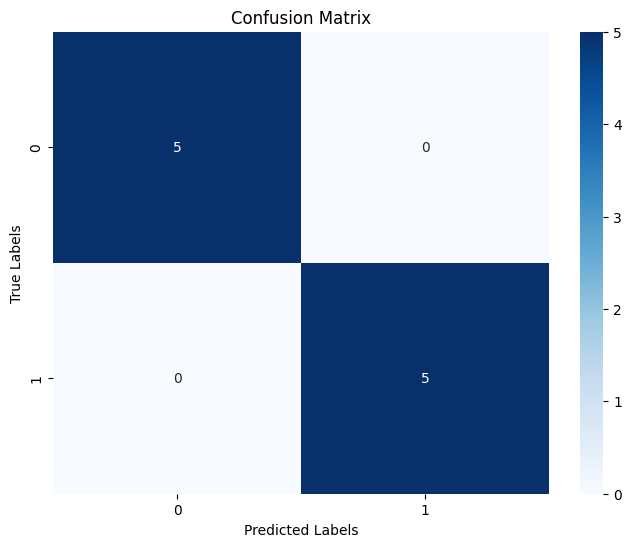

In [44]:
import seaborn as sns
final_model = tpot
final_predictions = final_model.predict(X_test_selected)
conf_mat = confusion_matrix(y_test, final_predictions)

plt.figure(figsize = (8,6))
sns.heatmap(conf_mat, annot = True, cmap = 'Blues', fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [45]:
from tpot import TPOTClassifier
import time
# Initialize and run TPOT to find the best model
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, scoring='accuracy',
                      random_state=42, n_jobs=-1, early_stop=5, cv=5,
                      config_dict={'sklearn.naive_bayes.GaussianNB': {},
                                   'sklearn.tree.DecisionTreeClassifier': {'criterion': ['gini', 'entropy'],
                                                                          'max_depth': range(1, 11)},
                                   'sklearn.neighbors.KNeighborsClassifier': {'n_neighbors': range(1, 21)},
                                   'sklearn.linear_model.LogisticRegression': {'solver': ['lbfgs', 'liblinear', 'saga'],
                                                                               'penalty': ['l1', 'l2'],
                                                                               'C': [0.1, 0.5, 1.0, 1.5]},
                                   'sklearn.ensemble.RandomForestClassifier': {'n_estimators': [100, 200, 300, 400, 500],
                                                                                 'criterion': ['gini', 'entropy'],
                                                                                 'max_depth': range(1, 11)}})

start_time = time.time()
tpot.fit(X_train_selected, y_train)
end_time = time.time()

# Get the best model found by TPOT
best_model = tpot.fitted_pipeline_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test_selected, y_test)

# Evaluate the best model on the training set (if needed)
train_accuracy = best_model.score(X_train_selected, y_train)

# Predictions on the test set
start_time_predict = time.time()
final_predictions = best_model.predict(X_test_selected)
end_time_predict = time.time()

# Calculate prediction time
prediction_time = end_time_predict - start_time_predict

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: DecisionTreeClassifier(CombineDFs(input_matrix, input_matrix), criterion=entropy, max_depth=9)


In [46]:
# Calculate training time
training_time = end_time - start_time

# Print the training time
print(f"Training Time: {training_time:.2f} seconds")

Training Time: 292.31 seconds


In [47]:
# Print the results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Prediction Time: {prediction_time:.2f} seconds")

Test Accuracy: 1.0000
Training Accuracy: 1.0000
Prediction Time: 0.00 seconds


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



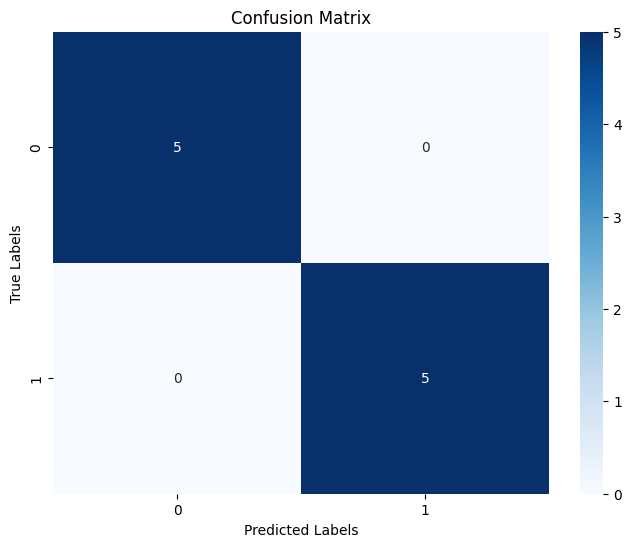

In [48]:
# Generate and print classification report and confusion matrix
classification_rep = classification_report(y_test, final_predictions)
print('Classification Report:\n', classification_rep)

conf_mat = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [50]:
tpot.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_encoded = tpot.predict(X_test_selected)

# Print the encoded predicted outputs
print("Encoded Predicted Outputs:")
print(y_pred_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: DecisionTreeClassifier(CombineDFs(input_matrix, input_matrix), criterion=entropy, max_depth=9)
Encoded Predicted Outputs:
[0 1 0 1 0 1 0 1 1 0]


In [51]:
# Inverse transform the predicted labels
y_pred_original = label_encoder.inverse_transform(y_pred_encoded)

# Print the decoded predicted outputs
print("Decoded Predicted Outputs:")
print(y_pred_original)


Decoded Predicted Outputs:
['Benign' 'Malicious' 'Benign' 'Malicious' 'Benign' 'Malicious' 'Benign'
 'Malicious' 'Malicious' 'Benign']
